# Universidad de Buenos Aires
# Deep Learning - Examen
# Agosto 2023



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 27 de Agosto a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen AGOSTO 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



## Ejercicio 1



Dada la siguiente función:

$$
f(x,y) = (1.5 - x + xy)^2 + (2.25-x+xy^2)^2 + (2.625 -x + xy^3)^2
$$


Encontrar el punto donde la función es mínima y el valor de dicho mínimo:

a. Utilizando SGD y cálculo de gradiente con regla de la cadena.

b. Utilizando SGD y pytorch.

a. Para encontrar el punto donde la función $f(x,y)$ es mínima utilizando el método del Descenso del Gradiente (SGD) y el cálculo de gradiente con la regla de la cadena, necesitamos calcular las derivadas parciales de $f(x,y)$ con respecto a $x$ e $y$ y luego actualizar $x$ e $y$ iterativamente utilizando el gradiente y un factor de aprendizaje.

La función que queremos minimizar es:
$$
f(x,y) = (1.5 - x + xy)^2 + (2.25-x+xy^2)^2 + (2.625 -x + xy^3)^2
$$

Paso 1: Calculamos las derivadas parciales de la función con respecto a $x$ e $y$ utilizando la regla de la cadena:

$$
\frac{\partial f}{\partial x} = 2(1.5 - x + xy)(-1)+2(2.25-x+xy^2)(-1)+2(2.625 -x + xy^3)(-1) =
$$

$$ 
= -2(1.5 - x + xy)-2(2.25-x+xy^2)-2(2.625 -x + xy^3)
$$

$$
\frac{\partial f}{\partial y} = 2(1.5 - x + xy)x+2(2.25-x+xy^2)(2y)+2(2.625 -x + xy^3)(3y^2) =
$$

$$
= 2x(1.5 - x + xy)+4y(2.25-x+xy^2)+6y^2(2.625 -x + xy^3)
$$

Paso 2: Inicializamos valores para $x$, $y$ y el factor de aprendizaje $\alpha$. A partir de estos valores, iteramos actualizando $x$ e $y$ en función de las derivadas parciales:

$$
x_{nuevo} = x_{viejo} - \alpha \frac{\partial f}{\partial x_{viejo}}
$$

$$
y_{nuevo} = y_{viejo} - \alpha \frac{\partial f}{\partial y_{viejo}}
$$

Repetimos estos pasos hasta que los valores de $x$ e $y$ converjan a un mínimo o se alcance un número máximo de iteraciones.

b. El código a continuación utiliza el tensor x e y de PyTorch para realizar el descenso de gradiente. La función backward() calcula automáticamente los gradientes y el método zero_() se utiliza para restablecer los gradientes en cada iteración.

In [1]:
import torch

# Definir la función
def f(x, y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# Inicializar valores de x e y
x = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([0.0], requires_grad=True)

# Tasa de aprendizaje
alpha = 0.01

# Número de iteraciones
num_iterations = 1000

# Descenso de gradiente
for _ in range(num_iterations):
    loss = f(x, y)
    loss.backward()  # Calcular los gradientes
    
    # Actualizar los valores de x e y
    with torch.no_grad():
        x -= alpha * x.grad
        y -= alpha * y.grad
        x.grad.zero_()
        y.grad.zero_()

# Imprimir el resultado
print("Resultado utilizando PyTorch:")
print("Valor mínimo:", loss.item())
print("Coordenadas (x, y):", x.item(), y.item())

Resultado utilizando PyTorch:
Valor mínimo: 5.6234504882013425e-05
Coordenadas (x, y): 2.9815101623535156 0.49534761905670166


## Ejercicio 2

Si tiene una imagen a procesar de 1024x720x3 y desea aplicar en cascada, 2 capas de convolución, seguido por una capa de activación y una de pooling,  con las siguientes características:

*Conv1:*
* tamaño kernel = 7x7
* padding = 2
* stride = 1
* número de kernel = 16

*Conv2:*
* tamaño kernel = 5x5
* padding = 0
* stride = 1
* número de kernel = 32

*activación*
* Tanh()

*pooling*
* tamaño pooling = 5x5
* padding pooling = 0
* stride pooling = 5

a) ¿Cual es el tamaño final de la salida y cuantos canales tiene?

b) Si tiene que conectar esa salida a una `fully_connected` para clasificar 3 clases ¿que tamaño debe tener?

a) Para calcular el tamaño y el número de canales de la salida después de aplicar las capas de convolución, activación y pooling en cascada, podemos seguir estos pasos: 

Capa Conv1: El tamaño de salida después de esta capa se calcula utilizando la fórmula:

$$
Tamaño\ de\ salida = \frac{Tamaño\ entrada + 2 \times Padding - Tamaño\ kernel}{Stride} +1
$$

Dado el tamaño de entrada $1024 \times 720 \times 3$ (ancho x alto x canales) y los datos proporcionados en el enunciado, se calcula el tamaño salida después de Conv1:

$$
Ancho = \frac{1024 + 2 * 2 - 7}{1} +1 =1022
$$

$$
Alto = \frac{720 + 2 * 2 - 7}{1} +1 = 718
$$

$$
Tamaño\ de\ salida = 1022 \times 718 \times 16
$$

Capa Conv2: Dado el tamaño de entrada (salida de Conv1) $1022 \times 718 \times 16$ y los datos proporcionados en el enunciado, se calcula el tamaño salida después de Conv2:

$$
Ancho = \frac{1022 + 2 * 0 - 5}{1} +1 = 1018
$$

$$
Alto = \frac{718 + 2 * 0 - 5}{1} +1 = 714
$$

$$
Tamaño\ de\ salida = 1018 \times 714 \times 32
$$​

Capa de activación: La función de activación Tanh() no afecta las dimensiones ni el número de canales, ya que la función de activación se aplica elemento por elemento en cada canal.

Capa de pooling: Dado el tamaño de entrada (salida de Conv2) $1018 \times 714 \times 32$ y los datos proporcionados en el enunciado, se calcula el tamaño salida después del pooling:

$$
Ancho = \frac{1018 + 2 * 0 - 5}{5} +1 = 203
$$

$$
Alto = \frac{714 + 2 * 0 - 5}{5} +1 = 142
$$

$$
Tamaño\ de\ salida = 203 \times 142 \times 32
$$

Después de aplicar las 2 capas de convolución, la activación (Tanh) y el pooling, el tamaño final de la salida es $203 \times 142 \times 32$.

El código presentado a continuación confirma estos resultados.

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        
        # Capas de convolución
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, padding=2, stride=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=0, stride=1)
        
        # Capa de activación
        self.activation = nn.Tanh()
        
        # Capa de pooling
        self.pooling = nn.MaxPool2d(kernel_size=5, padding=0, stride=5)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.activation(x)
        x = self.pooling(x)
        return x

# Crear una instancia de la red
model = CustomCNN()

# Crear una imagen de ejemplo (ten en cuenta que aquí el tamaño es 3x1024x720 en lugar de 1024x720x3)
input_image = torch.rand(1, 3, 1024, 720)

# Pasar la imagen a través de la red
output = model(input_image)

# Imprimir la forma del tensor de salida
output_shape = output.shape
print("Tamaño de la salida del modelo:", output_shape)

Tamaño de la salida del modelo: torch.Size([1, 32, 203, 142])


b) Después de todas las operaciones anteriores, la salida tiene un tamaño de $203 \times 142 \times 32$. Para conectar esta salida a una capa totalmente conectada (fully connected), primero debemos aplanarla en un vector unidimensional. El tamaño del vector será el producto del tamaño de las dimensiones espaciales y el número de canales:
$$
Tamaño\ del\ vector = 203 \times 142 \times 32 = 922432
$$
Por lo tanto, el tamaño de entrada de la fully connected debe ser 922432 para conectarlo correctamente a la fully connected que realizará la clasificación en 3 clases. Esto garantiza que cada elemento en la salida se conecte con una neurona en la capa fully connected, lo que permite que la red neuronal aprenda patrones y características para la clasificación.

El código presentado a continuación confirma los resultados.

In [13]:
# Definir la clase FullyConnectedClassifier 
class FullyConnectedClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FullyConnectedClassifier, self).__init__()
        
        self.fc = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        x = self.fc(x)
        return x

# Tamaño necesario para la capa fully connected
input_fc_size = output_shape[1] * output_shape[2] * output_shape[3]

# Crear una instancia del modelo FullyConnectedClassifier
classifier_model = FullyConnectedClassifier(input_fc_size, num_classes=3)

# Pasar la salida del modelo CustomCNN a través del modelo FullyConnectedClassifier
classification_output = classifier_model(output.view(-1, input_fc_size))

# Imprimir la forma del tensor de salida de la clasificación
print("Tamaño necesario para la capa fully connected:", input_fc_size)
print("Forma de la salida de la clasificación:", classification_output.shape)

Tamaño necesario para la capa fully connected: 922432
Forma de la salida de la clasificación: torch.Size([1, 3])


## Ejercicio 3




Para la siguiente red neuronal recurrente, se pide expresar las ecuaciones "*unfolded*" de la salida de la misma y de sus estados ocultos, si el vector de entrada son 3 muestras secuenciadas de la variable $x(t)$.

![b](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)




Ecuaciones de la RNN:

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$

Para expresar las ecuaciones "unfolded" de la salida y los estados ocultos de la red neuronal recurrente (RNN) cuando se le proporcionan 3 muestras secuenciadas de la variable $x(t)$, podemos seguir el flujo de la red en cada paso de tiempo. Asumiendo que las muestras secuenciales son $x(t_1)$, $x(t_2)$ y $x(t_3)$, las ecuaciones "unfolded" para la salida y los estados ocultos de la RNN serían las siguientes:

Paso 1: $t=t_1$ 

Salida:
$$ 
\hat{y}(t_1) = w_{h1y} * h1(t_1) + w_{h2y} * h2(t_1) + by
$$

Estados ocultos:

$$ 
h1(t_1) = w_{xh1} * x(t_1) + w_{h1h1} * h1(t_0) + w_{h2h1} * h2(t_0)+ bh1
$$
$$ 
h2(t_1) = w_{xh2} * x(t_1) + w_{h2h2} * h2(t_0) + w_{h1h2} * h1(t_0)+ bh2
$$

Paso 2: $t=t_2$ 

Salida:
$$ 
\hat{y}(t_2) = w_{h1y} * h1(t_2) + w_{h2y} * h2(t_2) + by
$$

Estados ocultos:
$$ 
h1(t_2) = w_{xh1} * x(t_2) + w_{h1h1} * h1(t_1) + w_{h2h1} * h2(t_1)+ bh1
$$
$$ 
h2(t_2) = w_{xh2} * x(t_2) + w_{h2h2} * h2(t_1) + w_{h1h2} * h1(t_1)+ bh2
$$

Paso 3: $t=t_3$ 

Salida:
$$ 
\hat{y}(t_3) = w_{h1y} * h1(t_3) + w_{h2y} * h2(t_3) + by
$$

Estados ocultos:
$$ 
h1(t_3) = w_{xh1} * x(t_3) + w_{h1h1} * h1(t_2) + w_{h2h1} * h2(t_2)+ bh1
$$
$$ 
h2(t_3) = w_{xh2} * x(t_3) + w_{h2h2} * h2(t_2) + w_{h1h2} * h1(t_2)+ bh2
$$

En cada paso de tiempo, las ecuaciones indican cómo se calcula la salida $\hat{y}$ y los estados ocultos $h1$ y $h2$ basados en las muestras secuenciales $x(t)$ y los estados ocultos anteriores $h1$ y $h2$. El subíndice en $h1(t)$ y $h2(t)$ representa el paso de tiempo $t$ y $h1(t_0)$ y $h2(t_0)$ representan los estados ocultos iniciales en el paso de tiempo $t_0$.

## Ejercicio 4

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

a) Entrenar un modelo de deep learning que no utilice embeddings y que no emplee el `user_id` ni el `product_id`.

In [2]:
# Librerias
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Cargar y preparar los datos 
df = pd.read_csv("dataset_black_sales.csv")

# Obtener los nombres de las columnas categóricas
cat_cols = df.select_dtypes(include='object').columns
print("Variables categóricas en el dataset:")
for col in cat_cols:
    print(col)

# Obtener los nombres de las columnas numéricas
num_cols = df.select_dtypes(include='number').columns
print("Variables numéricas en el dataset:")
for col in num_cols:
    print(col)


Variables categóricas en el dataset:
Product_ID
Gender
Age
City_Category
Stay_In_Current_City_Years
Variables numéricas en el dataset:
User_ID
Occupation
Marital_Status
Product_Category_1
Product_Category_2
Product_Category_3
Purchase


In [35]:
# Cargar los datos 
df = pd.read_csv("dataset_black_sales.csv")

# Dividir los datos en características (X) y etiquetas (y)
X = df.drop(columns=['Purchase','User_ID','Product_ID'])  # Características
y = (df['Purchase'] > 9000).astype(int)  # Etiquetas (1 si gasto > 9000, 0 en caso contrario)

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'])

# Normalizar características numéricas
#num_cols = ['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
#scaler = StandardScaler()
#X[num_cols] = scaler.fit_transform(X[num_cols])

# Dividir el conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definir el modelo
model_a = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Capa de entrada
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida (clasificación binaria)
])

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_a.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

y_train = np.array(y_train, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)
X_train = np.array(X_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# Entrenar el modelo y guardar el historial
history_a = model_a.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model_a.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

Epoch 1/10
10314/10314 [==============================] - 16s 2ms/step - loss: nan - accuracy: 0.6012 - val_loss: nan - val_accuracy: 0.6031
Epoch 2/10
10314/10314 [==============================] - 16s 2ms/step - loss: nan - accuracy: 0.6012 - val_loss: nan - val_accuracy: 0.6031
Epoch 3/10
10314/10314 [==============================] - 17s 2ms/step - loss: nan - accuracy: 0.6012 - val_loss: nan - val_accuracy: 0.6031
Epoch 4/10
10314/10314 [==============================] - 16s 2ms/step - loss: nan - accuracy: 0.6012 - val_loss: nan - val_accuracy: 0.6031
Epoch 5/10
10314/10314 [==============================] - 16s 2ms/step - loss: nan - accuracy: 0.6012 - val_loss: nan - val_accuracy: 0.6031
Epoch 6/10
10314/10314 [==============================] - 19s 2ms/step - loss: nan - accuracy: 0.6012 - val_loss: nan - val_accuracy: 0.6031
Epoch 7/10
10314/10314 [==============================] - 15s 1ms/step - loss: nan - accuracy: 0.6012 - val_loss: nan - val_accuracy: 0.6031
Epoch 8/10
10

b)	Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.

In [31]:
# Dividir los datos en características (X) y etiquetas (y)
X = df.drop(columns=['Purchase'])  # Características
y = (df['Purchase'] > 9000).astype(int)  # Etiquetas (1 si gasto > 9000, 0 en caso contrario)

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'])

# Realizar el mapeo de user_ids y product_ids a índices
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()
user_indices = user_encoder.fit_transform(df['User_ID'])
product_indices = product_encoder.fit_transform(df['Product_ID'])

# Crear un diccionario de embeddings para usuarios y productos
num_users = len(np.unique(user_indices))
num_products = len(np.unique(product_indices))

# Dividir el conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Dimensión del embedding
embedding_dim = 16  

# Definir el modelo utilizando embeddings para usuarios y productos
user_input = tf.keras.layers.Input(shape=(1,))
product_input = tf.keras.layers.Input(shape=(1,))
user_embed = tf.keras.layers.Embedding(input_dim=len(user_encoder.classes_), output_dim=embedding_dim)(user_input)
product_embed = tf.keras.layers.Embedding(input_dim=len(product_encoder.classes_), output_dim=embedding_dim)(product_input)
combined_embed = tf.keras.layers.Concatenate()([user_embed, product_embed])
flatten_embed = tf.keras.layers.Flatten()(combined_embed)
dense_layer = tf.keras.layers.Dense(64, activation='relu')(flatten_embed)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dense_layer)

model_b = tf.keras.Model(inputs=[user_input, product_input], outputs=output_layer)

# Compilar el modelo
model_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo y guardar el historial
history_b = model_b.fit([user_indices[X_train.index], product_indices[X_train.index]], y_train,
                        epochs=10, batch_size=32,
                        validation_data=([user_indices[X_val.index], product_indices[X_val.index]], y_val))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model_b.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

Epoch 1/10
10314/10314 [==============================] - 27s 3ms/step - loss: 0.2891 - accuracy: 0.8683 - val_loss: 0.2670 - val_accuracy: 0.8785
Epoch 2/10
10314/10314 [==============================] - 26s 2ms/step - loss: 0.2529 - accuracy: 0.8854 - val_loss: 0.2643 - val_accuracy: 0.8807
Epoch 3/10
10314/10314 [==============================] - 27s 3ms/step - loss: 0.2439 - accuracy: 0.8889 - val_loss: 0.2621 - val_accuracy: 0.8811
Epoch 4/10
10314/10314 [==============================] - 31s 3ms/step - loss: 0.2373 - accuracy: 0.8921 - val_loss: 0.2631 - val_accuracy: 0.8810
Epoch 5/10
10314/10314 [==============================] - 30s 3ms/step - loss: 0.2312 - accuracy: 0.8953 - val_loss: 0.2662 - val_accuracy: 0.8807
Epoch 6/10
10314/10314 [==============================] - 29s 3ms/step - loss: 0.2249 - accuracy: 0.8984 - val_loss: 0.2676 - val_accuracy: 0.8795
Epoch 7/10
10314/10314 [==============================] - 29s 3ms/step - loss: 0.2184 - accuracy: 0.9021 - val_loss: 0

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

c)	Grafique las curvas de la loss function en función de las epochs de cada modelo y comente lo necesario.

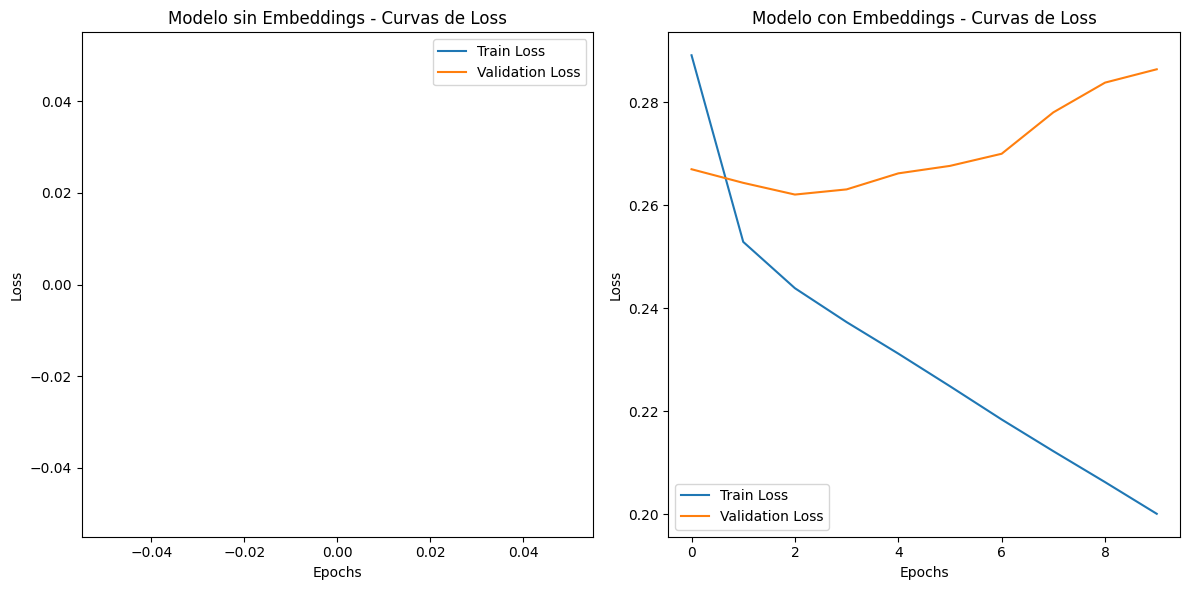

In [33]:
plt.figure(figsize=(12, 6)) 

# Graficar las curvas de loss para el modelo sin embeddings
plt.subplot(1, 2, 1)
plt.plot(history_a.history['loss'], label='Train Loss')
plt.plot(history_a.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Modelo sin Embeddings - Curvas de Loss')
plt.legend()

# Graficar las curvas de loss para el modelo con embeddings
plt.subplot(1, 2, 2)
plt.plot(history_b.history['loss'], label='Train Loss')
plt.plot(history_b.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Modelo con Embeddings - Curvas de Loss')
plt.legend()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

d) Compare el score de cada modelo.

In [34]:
# Calcular las predicciones de ambos modelos en el conjunto de prueba
predictions_a = model_a.predict(X_test)
predictions_b = model_b.predict([test_user_indices, test_product_indices])

# Convertir las predicciones en etiquetas binarias (0 o 1)
labels_pred_a = (predictions_a > 0.5).astype(int)
labels_pred_b = (predictions_b > 0.5).astype(int)

# Calcular métricas completas para ambos modelos
report_a = classification_report(y_test, labels_pred_a, target_names=['Clase 0', 'Clase 1'])
report_b = classification_report(y_test, labels_pred_b, target_names=['Clase 0', 'Clase 1'])

# Calcular la matriz de confusión para ambos modelos
conf_matrix_a = confusion_matrix(y_test, labels_pred_a)
conf_matrix_b = confusion_matrix(y_test, labels_pred_b)

# Imprimir los resultados
print("Resultados del Modelo sin Embeddings:")
print(report_a)
print("Matriz de Confusión:")
print(conf_matrix_a)

print("\nResultados del Modelo con Embeddings:")
print(report_b)
print("Matriz de Confusión:")
print(conf_matrix_b)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).